Read the data

In [78]:
import pandas as pd 
df = pd.read_csv("medical_examination.csv")
df.tail(20)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69980,99971,17727,2,167,69.0,110,80,1,1,0,1,0,0
69981,99972,17500,2,182,110.0,130,90,2,2,0,0,1,1
69982,99973,18941,1,153,86.0,130,90,1,2,0,0,1,1
69983,99974,19652,1,165,72.0,120,80,1,1,0,0,1,0
69984,99975,17926,2,168,80.0,120,80,1,1,0,0,1,1
69985,99977,18194,1,156,102.0,130,80,1,1,0,1,0,1
69986,99978,18198,2,180,78.0,120,80,1,1,0,0,1,0
69987,99979,18852,1,151,49.0,120,80,1,1,0,0,1,0
69988,99981,21978,1,160,59.0,110,70,1,1,0,0,1,0
69989,99985,21013,1,157,83.0,120,70,1,1,0,0,1,1


Calculating BMI and determining if the person is overweight or not

In [79]:
import numpy as np
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
df['overweight'] = (df['bmi'] > 25).astype(int)
df['overweight'] 
df


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,1


Normalizing the data by making 0 as always good and 1 as always bad. If the value of cholesterol or gluc is 1, the value is 0. If the value is more than 1, then value is 1.

In [80]:
df['cholesterol'] = np.where(df['cholesterol']==1, 0,1)
df['gluc'] = np.where(df['gluc'] == 1, 0,1)
df.drop(['bmi'], inplace = True, axis = 1 )
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value.

In [81]:
col = ['cholesterol','gluc','smoke','alco','active','overweight']
df_cat = pd.melt(df, id_vars='cardio', value_vars = col)

df_cat = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='Total')
df_cat.rename (columns= {'value': 'feature value'}, inplace = True)

Ploting a catagorical plot using seaborn

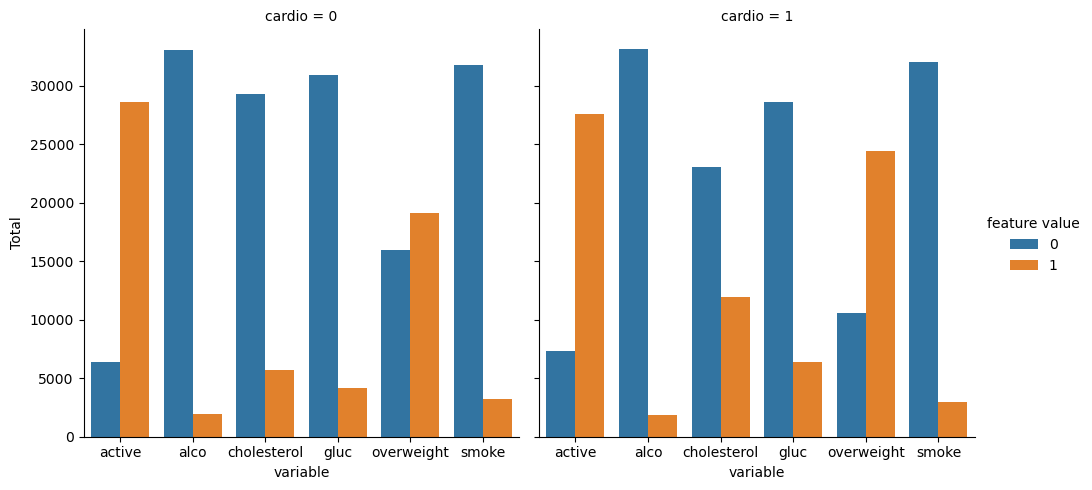

In [86]:
import seaborn as sns
sns.catplot(x='variable', y='Total', hue='feature value', col='cardio' , data=df_cat, kind='bar')

Further data cleaning:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [83]:
dgs = df['ap_lo'] <= df['ap_hi']
h25q=df['height']>=df['height'].quantile(0.025)
h975q=df['height']<=df['height'].quantile(0.975)
w25q=df['weight']>=df['weight'].quantile(0.025)
w975q=df['weight']<=df['weight'].quantile(0.975)
df_heat = df.loc[dgs&h25q&h975q&w25q&w975q]
df_heat.corr()




,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


Correlation matrix calculation and heat map plot

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

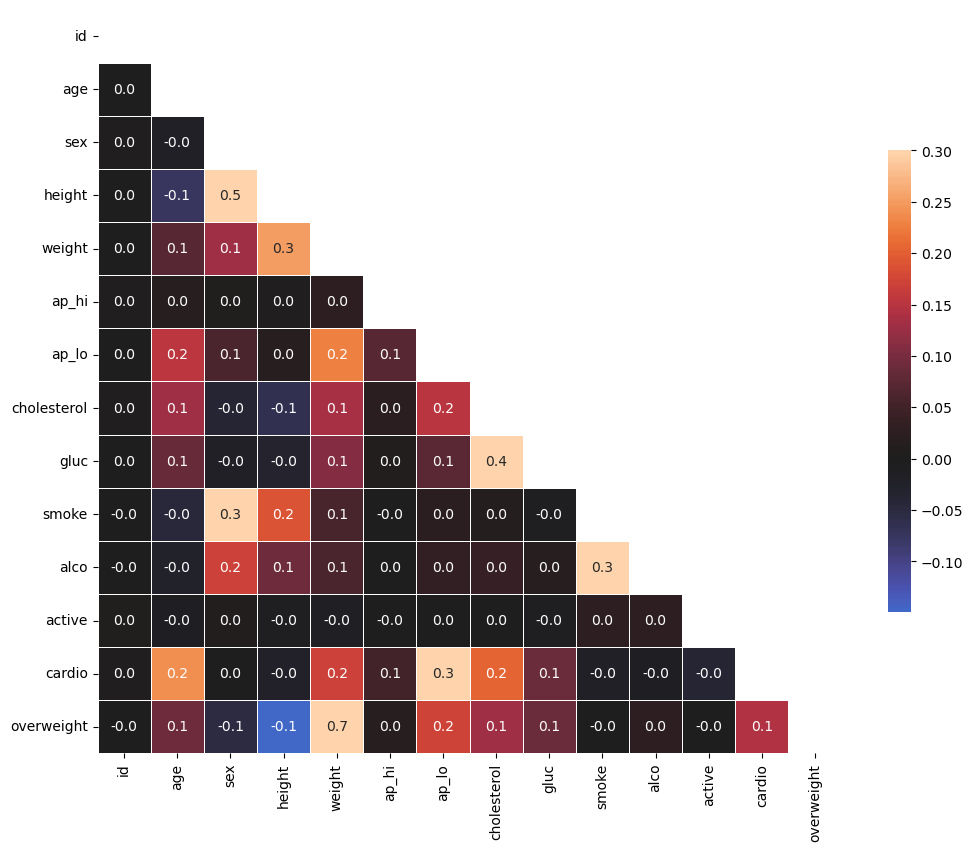

In [84]:
import matplotlib.pyplot as plt 
corr = df_heat.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', linewidths=.5, vmax=.3, center=0, square=True, cbar_kws={'shrink': .5})
mask